# HEART DISEASE DETECTION
Daniel García Zapata <br>
Carles Coll Gomila<br>
Barath Bheeman

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# HEART DISEASE

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.

<center><img src="images/heart2.png" alt="HeartDisease" align="center"/><center/>

Coronary heart disease is a common term for the buildup of plaque in the heart’s arteries that could lead to heart attack. However, coronary heart disease (CHD), is a result of coronary artery disease (CAD).

<center><img src="images/coronary.gif" alt="Coronary" align="center"/><center/>

# DECISION

We propose an intelligent decision support system to help doctors diagnose the presence or absence of coronary artery disease. 
-----Barath 

<center><img src="images/decision.jpg" alt="Decision" align="center"/><center/>

# FUNCTIONAL ARCHITECTURE

<center><img src="images/architecture.png" alt="HeartDisease" align="center"/><center/>

In [2]:
'''
HEART DISEASE DETECTION
Sources: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
         https://archive.ics.uci.edu/ml/datasets/Statlog+(Heart)

List of available variables:

1. (age) 
2. (sex) 
3. (cp)
4. (trestbps) 
5. (chol) 
6. (fbs)
7. (restecg) 
8. (thalach) 
9. (exang) 
10. (oldpeak) 
11. (slope) 
12. (ca) 
13. (thal) 
14. (num) (the predicted attribute) 

* Note for cleveland dataset: Experiments have been concentrated on distinguishing
                              presence (values 1,2,3,4) from absence (value 0).
* Note for statlog dataset:   Experiments have been concentrated on distinguishing  
                              presence (values 2) from absence (value 1).
'''
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint

'''
Create Pandas dataframe.
'''
columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

## Cleveland Data Set ##
df_cleveland = pd.read_table('data/heart_disease_all14.csv', sep=',', header=None, names=columns)
# Replace predicted value into presence (values 1,2,3,4 = 1) and absence (value 0)
df_cleveland['label'].replace(to_replace=[1,2,3,4],value=1,inplace=True)
# Add column to identify dataset origin
df_cleveland['dataset'] = 1

## Statlog Data Set ##
df_statlog   = pd.read_table('data/heart.dat', sep=' ', header=None, names=columns)
# Replace predicted value into absence (0) or presence (1)
df_statlog['label'].replace(to_replace=[1],value=0,inplace=True)
df_statlog['label'].replace(to_replace=[2],value=1,inplace=True)
# Add column to identify dataset origin
df_statlog['dataset'] = 0

# Join both datasets
frames = [df_cleveland, df_statlog]
df = pd.concat(frames, ignore_index=True)

df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,dataset
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,54.479789,0.678383,3.168717,131.539543,248.149385,0.145870,1.005272,149.493849,0.330404,1.054482,1.595782,0.671353,4.722320,0.455185,0.525483
std,9.059857,0.467508,0.956633,17.787149,52.106647,0.353286,0.995575,23.122539,0.470773,1.153463,0.615283,0.939680,1.939275,0.498426,0.499790
min,29.000000,0.000000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000


## DATA EXPLORATION

The data that we have used to build the decision support system consists of two different datasets that have the same number and types of attributes. One is the Cleveland Heart Disease Dataset, which contains 303 instances with 14 attributes, and the other one is the Statlog Heart Dataset, which contains 266 instances with the exact same attributes. 

In [3]:
'''
Separate features for better normalization: ONLY FOR VISUALIZATION
'''
ex_col1 = list(df.loc[:,'age':'thalach'])
ex_col2 = list(df.loc[:,'exang':'label'])

ex1 = df[ex_col1]
ex2 = df[ex_col2]

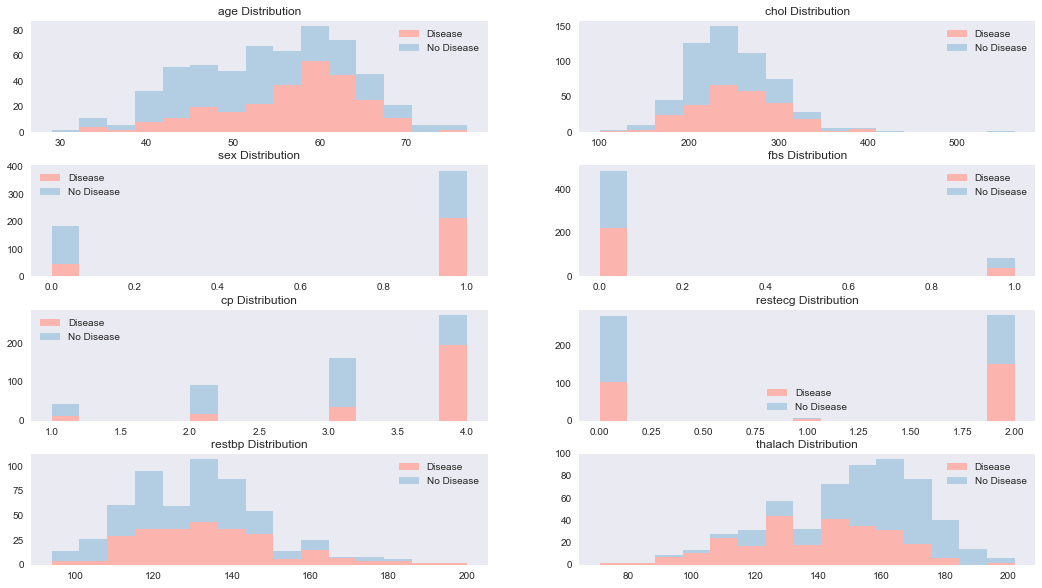

In [4]:
'''
FEATURE VISUALIZATION BY DISEASE OR NO DISEASE
'''
current_palette = sns.color_palette('Pastel1')
sns.set_palette(current_palette)

# Plot the distribution of each variable
fig, ax = plt.subplots(4, 2, figsize=(18, 10))
for en, var in enumerate(ex1.columns.values):
    i = (lambda:0, lambda:1)[en > 3]()
    e = (lambda:e+1, lambda:0)[en == 4 or en == 0]()
    ax[e,i].hist([df[df.label>0][var].tolist(), df[df.label<1][var].tolist()],
                 bins=15,
                 stacked=True,
                 rwidth=1.0,
                 label=['Disease', 'No Disease'])
    ax[e,i].set_title(var + ' Distribution')
    ax[e,i].legend()
    ax[e,i].grid()   
fig.subplots_adjust(hspace=0.3)

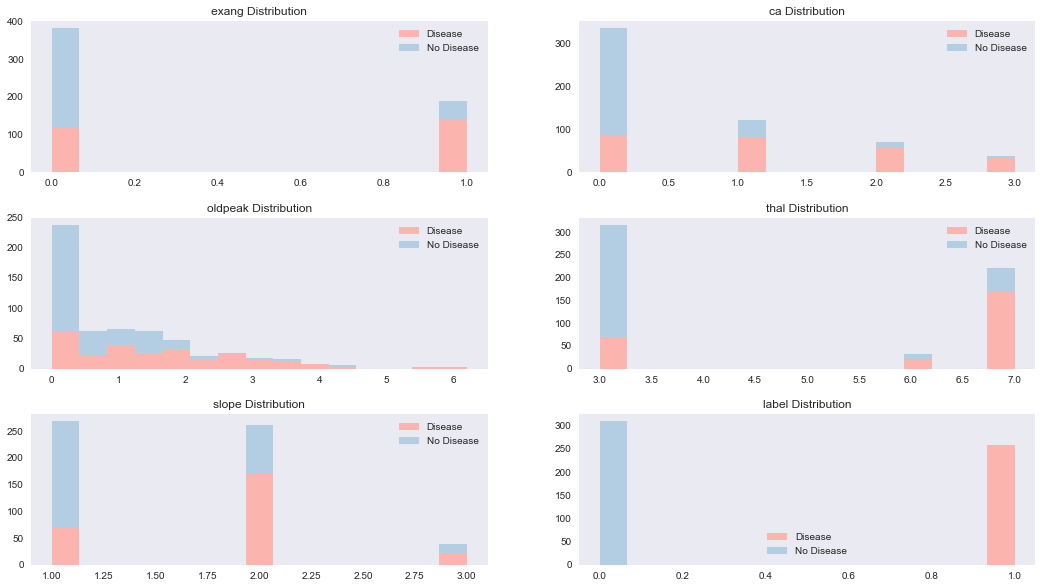

In [5]:
current_palette = sns.color_palette('Pastel1')
sns.set_palette(current_palette)

# Plot the distribution of each variable
fig, ax = plt.subplots(3, 2, figsize=(18, 10))
for en, var in enumerate(ex2.columns.values):
    i = (lambda:0, lambda:1)[en > 2]()
    e = (lambda:e+1, lambda:0)[en == 3 or en == 0]()
    ax[e,i].hist([df[df.label>0][var].tolist(), df[df.label<1][var].tolist()],
                 bins=15,
                 stacked=True,
                 rwidth=1.0,
                 label=['Disease', 'No Disease'])
    ax[e,i].set_title(var + ' Distribution')
    ax[e,i].legend()
    ax[e,i].grid()   
fig.subplots_adjust(hspace=0.3)

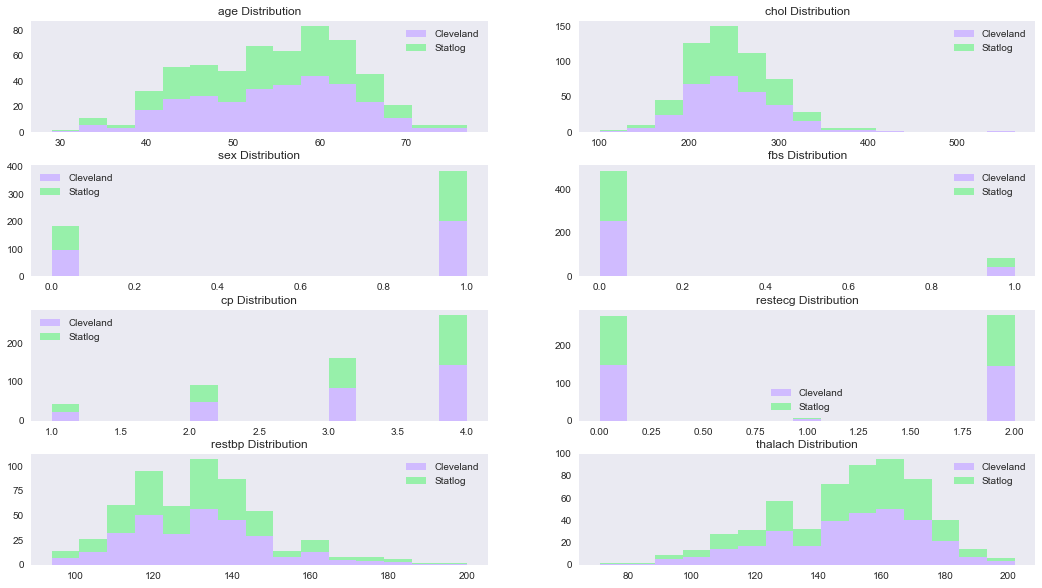

In [6]:
'''
FEATURE VISUALIZATION BY DATASET
'''
current_palette = sns.color_palette('Pastel1')
pastel=["#D0BBFF", "#97F0AA"]
sns.set_palette(current_palette)

# Plot the distribution of each variable
fig, ax = plt.subplots(4, 2, figsize=(18, 10))
for en, var in enumerate(ex1.columns.values):
    i = (lambda:0, lambda:1)[en > 3]()
    e = (lambda:e+1, lambda:0)[en == 4 or en == 0]()
    ax[e,i].hist([df[df.dataset>0][var].tolist(), df[df.dataset<1][var].tolist()],
                 bins=15,
                 stacked=True,
                 rwidth=1.0,
                 color=pastel,
                 label=['Cleveland', 'Statlog'])
    ax[e,i].set_title(var + ' Distribution')
    ax[e,i].legend()
    ax[e,i].grid()   
fig.subplots_adjust(hspace=0.3)

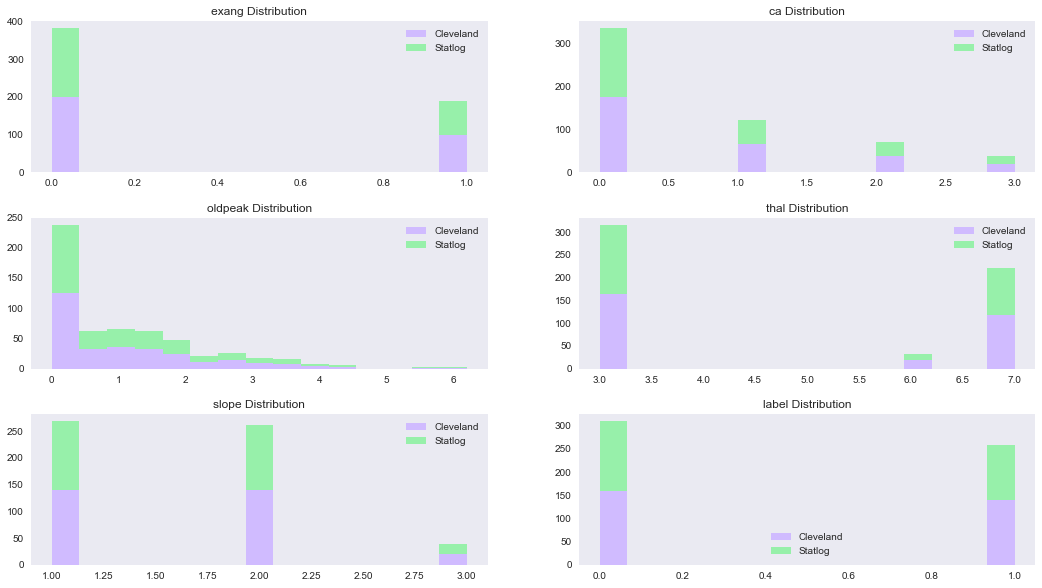

In [7]:
current_palette = sns.color_palette('Pastel1')
pastel=["#D0BBFF", "#97F0AA"]
sns.set_palette(current_palette)

# Plot the distribution of each variable
fig, ax = plt.subplots(3, 2, figsize=(18, 10))
for en, var in enumerate(ex2.columns.values):
    i = (lambda:0, lambda:1)[en > 2]()
    e = (lambda:e+1, lambda:0)[en == 3 or en == 0]()
    ax[e,i].hist([df[df.dataset>0][var].tolist(), df[df.dataset<1][var].tolist()],
                 bins=15,
                 stacked=True,
                 rwidth=1.0,
                 color=pastel,
                 label=['Cleveland', 'Statlog'])
    ax[e,i].set_title(var + ' Distribution')
    ax[e,i].legend()
    ax[e,i].grid()   
fig.subplots_adjust(hspace=0.3)

del df['dataset']

In [8]:
# '''
# Correlation Matrix
# '''
# k = 14 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'label')['label'].index
# cm = np.corrcoef(df[cols].values.T)
# sns.set(font_scale=1.25)

# fig, ax = plt.subplots(figsize=(10,10))
# hm = sns.heatmap(cm, cbar=True, 
#                  annot=True, square=True, 
#                  fmt='.2f', annot_kws={'size': 10}, 
#                  yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [9]:
# g = sns.pairplot(ex2, hue='label')

## PRE-PROCESSING

In [10]:
'''
PRE-PROCESSING

Convert categorical variables with more than two values into dummy variables.

* Note that variable ca is discrete but not categorical, so we don't convert it.
'''

# Convert cp
dummies = pd.get_dummies(df['cp'],prefix='cp')
df      = df.join(dummies)
del df['cp']
df      = df.rename(columns = {'cp_1.0':'cp_1', 'cp_2.0':'cp_2', 'cp_3.0':'cp_3', 'cp_4.0':'cp_4'})

# Convert restecg
dummies = pd.get_dummies(df['restecg'],prefix='recg')
df      = df.join(dummies)
del df['restecg']
df      = df.rename(columns = {'recg_0.0':'recg_0','recg_1.0':'recg_1', 'recg_2.0':'recg_2'})

# Convert slope
dummies = pd.get_dummies(df['slope'],prefix='slope')
df      = df.join(dummies)
del df['slope']
df      = df.rename(columns = {'slope_1.0':'slope_1','slope_2.0':'slope_2', 'slope_3.0':'slope_3'})

# Convert thal
dummies = pd.get_dummies(df['thal'],prefix='thal')
df      = df.join(dummies)
del df['thal']
df      = df.rename(columns = {'thal_3.0':'thal_3','thal_6.0':'thal_6', 'thal_7.0':'thal_7'})

''' Print Dummy Variables '''
dummy_variable = list(df.loc[:,'cp_1':'thal_7'])
df[dummy_variable].describe()

,cp_1,cp_2,cp_3,cp_4,recg_0,recg_1,recg_2,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.075571,0.159930,0.284710,0.479789,0.492091,0.010545,0.497364,0.472759,0.458699,0.068541,0.555360,0.056239,0.388401
std,0.264543,0.366863,0.451673,0.500031,0.500377,0.102235,0.500433,0.499697,0.498730,0.252895,0.497363,0.230585,0.487815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
'''
FEATURES: 22

Show the features after creating dummy variables
'''
df.describe()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,label,...,cp_4,recg_0,recg_1,recg_2,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,54.479789,0.678383,131.539543,248.149385,0.145870,149.493849,0.330404,1.054482,0.671353,0.455185,...,0.479789,0.492091,0.010545,0.497364,0.472759,0.458699,0.068541,0.555360,0.056239,0.388401
std,9.059857,0.467508,17.787149,52.106647,0.353286,23.122539,0.470773,1.153463,0.939680,0.498426,...,0.500031,0.500377,0.102235,0.500433,0.499697,0.498730,0.252895,0.497363,0.230585,0.487815
min,29.000000,0.000000,94.000000,100.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,212.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,243.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,277.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# New list of column labels after pre-processing
new_columns = [ 'age', 'sex', 'restbp', 'chol', 'fbs', 'thalach', 
                'exang', 'oldpeak', 'ca', 'label', 
                'cp_1', 'cp_2', 'cp_3', 'cp_4',
                'recg_0', 'recg_1', 'recg_2',
                'slope_1', 'slope_2', 'slope_3',
                'thal_3', 'thal_6', 'thal_7']

print('\n %i patients in total, out of which %i with desease and %i without disease\n' \
      % (len(df.index),len(df[df.label==1].index),len(df[df.label==0].index)))


 569 patients in total, out of which 259 with desease and 310 without disease



STANDARDIZE AND NORMALIZE

- Normalization scales all numeric variables in the range [0,1].
    Columns = 'ca'
<center><img src="images/norm.png" alt="Normalization" align="center"/><center/>

- Standardization transforms the data to have zero mean and unit variance.
    Columns = 'age','restbp','chol','thalach','oldpeak'`
<center><img src="images/stand.png" alt="Standardization" align="center"/><center/>

In [13]:
# Choose columns to be standardize and normalize respectively
stdcols = ['age','restbp','chol','thalach','oldpeak']
nrmcols = ['ca']

preprocessed_df   = df.copy()

preprocessed_df[stdcols] = preprocessed_df[stdcols].apply(lambda x: (x-x.mean())/x.std())
preprocessed_df[nrmcols] = preprocessed_df[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))

mean_stdcols = [df[col].mean() for col in stdcols]
std_stdcols = [df[col].std() for col in stdcols]
mean_ca = df[nrmcols].mean()
max_ca = df[nrmcols].max()
min_ca = df[nrmcols].min()

# Move predict feature (num) to be the first feature
new_columns_pre = new_columns[:9] + new_columns[10:]
new_columns_pre.insert(0,new_columns[9])
preprocessed_df = preprocessed_df.reindex(columns=new_columns_pre)

# Convert dataframe into lists for use by classifiers
y = preprocessed_df['label']
x = preprocessed_df[new_columns_pre[1:]].values

Feature ranking:
1 cp_3 0.106411120969
2 slope_3 0.104773886738
3 ca 0.0975774170718
4 thal_6 0.0743391930332
5 thalach 0.0724678617998
6 exang 0.0640088563435
7 age 0.0623130293046
8 oldpeak 0.0603046653932
9 restbp 0.0581803381223
10 chol 0.05475122146
11 recg_2 0.0398751201442
12 sex 0.0369336520377
13 slope_1 0.0360193967049
14 cp_2 0.0259094975939
15 cp_4 0.0220416204799
16 recg_1 0.0211222894713
17 label 0.0174101718162
18 fbs 0.0161906936261
19 cp_1 0.0130751939148
20 slope_2 0.00747318091225
21 thal_3 0.00725557771658
22 recg_0 0.00156601534704


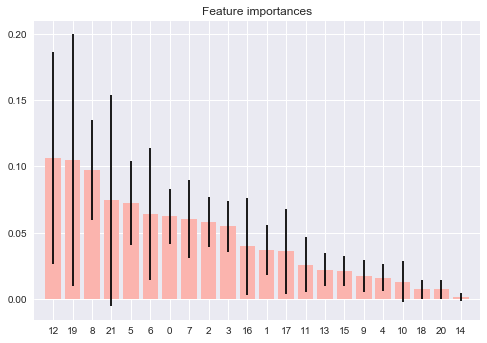

In [14]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(f + 1, new_columns[indices[f]], importances[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
        yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

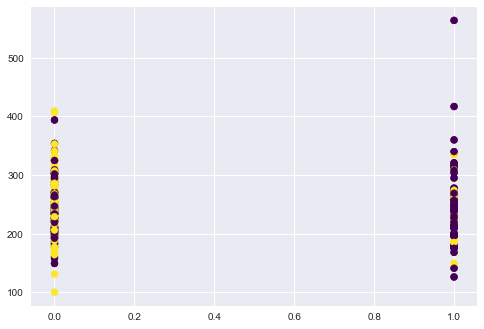

In [15]:
plt.scatter(df['cp_3'], df['chol'], c=df['label'], cmap = 'viridis')

plt.show()

## SPLITTING THE  DATA

We split the data into training and test sets:
<ul>
    <li>75% for training</li>
    <li>25% for testing </li>
</ul>

The disease category is also quite balanced:
<ul>
    <li>310 instances belong to absence</li>
    <li>2259 instances belong to presence</li>
</ul>

In [16]:
'''
Partition dataset into Training and Test
'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y,
                                                     test_size=0.25,
                                                     random_state=42)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

labels_train = np.c_[y_train, 1 - y_train]
labels_train = np.float32(labels_train)

labels_test = np.c_[y_test, 1 - y_test]
labels_test = np.float32(labels_test)

# LOGISTIC REGRESSION

We begin with the Logistic Regression linear classifier. We add a bias to the decision function and specify strong regularization. 

In [17]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

lasso = True

nfeatures = len(preprocessed_df.columns)
if lasso:           # lasso regularization
    penalty = "l1"
    cval    = 1.0
    alpha   = [1.0]*nfeatures
else:               # no regularization
    penalty = "l1"
    cval    = 1000.0
    alpha   = 0.0

model = LogisticRegression(fit_intercept=True,penalty=penalty,dual=False,C=cval)
lrfit = model.fit(X_train,y_train)

y_pred = lrfit.predict(X_test)

print('\nLogistic Regression accuracy on test set: %f\n' % sklearn.metrics.accuracy_score(y_test, y_pred))

print('\nMetrics:')
print(metrics.classification_report(y_test,y_pred))

print('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred))


Logistic Regression accuracy on test set: 0.853147


Metrics:
             precision    recall  f1-score   support

        0.0       0.84      0.89      0.87        76
        1.0       0.87      0.81      0.84        67

avg / total       0.85      0.85      0.85       143


Confusion matrix:
[[68  8]
 [13 54]]


# ADABOOST

We measure the performance of AdaBoost with 200 decision trees as base estimators.

In [18]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('\nAdaboost  accuracy on test set: %f\n' % sklearn.metrics.accuracy_score(y_test, y_pred))

print('\nMetrics:')
print(metrics.classification_report(y_test,y_pred))

print('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred))


Adaboost  accuracy on test set: 0.895105


Metrics:
             precision    recall  f1-score   support

        0.0       0.89      0.92      0.90        76
        1.0       0.91      0.87      0.89        67

avg / total       0.90      0.90      0.89       143


Confusion matrix:
[[70  6]
 [ 9 58]]


# SUPPORT VECTOR MACHINE

We apply support vector machine with a RBF kernel. We need to define two hyperparameters: the penalty parameter of the error term (C) and the kernel coefficient for the RBF. 
We find the optimal parameter values with an iterative method.

In [20]:
from sklearn import svm
import optunity
import optunity.metrics

cv_decorator = optunity.cross_validated(x=x, y=list(y), num_folds=5)

def svm_rbf_tuned_auroc(x_train, y_train, x_test, y_test, C, logGamma):
    model = sklearn.svm.SVC(C=C, gamma=10 ** logGamma).fit(x_train, y_train)
    decision_values = model.decision_function(x_test)
    auc = optunity.metrics.roc_auc(y_test, decision_values)
    return auc

svm_rbf_tuned_auroc = cv_decorator(svm_rbf_tuned_auroc)
# this is equivalent to the more common syntax below
# @optunity.cross_validated(x=data, y=labels, num_folds=5)
# def svm_rbf_tuned_auroc...

svm_rbf_tuned_auroc(C=1.0, logGamma=0.0)

optimal_rbf_pars, info, _ = optunity.maximize(svm_rbf_tuned_auroc, num_evals=500, C=[5, 15], logGamma=[-2, 0])
# when running this outside of IPython we can parallelize via optunity.pmap
# optimal_rbf_pars, _, _ = optunity.maximize(svm_rbf_tuned_auroc, 150, C=[0, 10], gamma=[0, 0.1], pmap=optunity.pmap)

print("Optimal parameters: " + str(optimal_rbf_pars))
#print("AUROC of tuned SVM with RBF kernel: %1.3f" % info.optimum)


rbf_svc = svm.SVC(C=optimal_rbf_pars['C'],
                  kernel='rbf',
                  gamma=10 ** optimal_rbf_pars['logGamma'])

svm_fit = rbf_svc.fit(X_train,y_train)
y_pred = rbf_svc.predict(X_test)

print('\nSVM  accuracy on test set: %f\n' % sklearn.metrics.accuracy_score(y_test, y_pred))

print('\nMetrics:')
print(metrics.classification_report(y_test,y_pred))

print('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred))

Optimal parameters: {'C': 14.1650390625, 'logGamma': -0.2333984375}

SVM  accuracy on test set: 0.923077


Metrics:
             precision    recall  f1-score   support

        0.0       0.93      0.92      0.93        76
        1.0       0.91      0.93      0.92        67

avg / total       0.92      0.92      0.92       143


Confusion matrix:
[[70  6]
 [ 5 62]]


# NEURAL NETWORK

In [21]:
'''
Batch function
'''
from random import sample

data_train = np.c_[X_train, labels_train]
n_samples = X_train.shape[0]

def batching(data, batch_size):
    samples = sample(range(0,data.shape[0]), batch_size)
    batch_xs = data[samples,:22] 
    batch_ys = data[samples,22:] 
    
    return batch_xs, batch_ys

In [22]:
'''
TENSORFLOW: 3 HIDDEN LAYERS NN
'''
import tensorflow as tf

# Reset Graph
tf.reset_default_graph()

num_features = 22
log_path = 'logs/'

# Hyper Parameters
learning_rate   = 0.001
training_epochs = 4000
batch_size      = 100
display_step    = 50

# Network Parameters
n_hidden_1 = 22 # 1st layer number of neurons
n_hidden_2 = 30 # 2nd layer number of neurons
n_hidden_3 = 40 # 3nd layer number of neurons
n_input    = 22 # data input
n_classes  = 2  # total classes 

# Placeholders
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_classes], name='y')

tf.add_to_collection('vars', x)
tf.add_to_collection('vars', y)

Create a function to get all the statistics of a variable and create summaries. This will be used to write summaries for things like weight vectors and biases.

In [23]:
# Code from - https://www.tensorflow.org/get_started/summaries_and_tensorboard
def variable_summaries(var):
    # Attach a scope for the summary
    with tf.name_scope("summaries"):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

Create a function for a neural network layer

In [24]:
def nn_layer(input_tensor, input_dim, output_dim, layer_name, act=tf.nn.relu):
    # Scope the entire layer with its name
    with tf.name_scope(layer_name):
        # Scope for the weights
        with tf.name_scope("weights"):
            weights = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1), name='weights')
            variable_summaries(weights)
        # Scope for biases
        with tf.name_scope("biases"):
            biases = tf.Variable(tf.constant(0.1, shape=([output_dim])), name='biases')
            variable_summaries(biases)
        # Scope for preactivations
        with tf.name_scope("preacts"):
            preacts = tf.add(tf.matmul(input_tensor, weights), biases)
            tf.summary.histogram('pre_activations', preacts)
        # Scope for activations 
        with tf.name_scope("activations"):
            activations = act(preacts, name="activation")
            tf.summary.histogram('activations', activations)
            
        return activations

Build the network

In [25]:
hidden1 = nn_layer(x, num_features, n_hidden_1, "layer1")
hidden2 = nn_layer(hidden1, n_hidden_1, n_hidden_2, "layer2")
hidden3 = nn_layer(hidden2, n_hidden_2, n_hidden_3, "layer3")

# Final layer - Use tf.identity to make sure there are no activations
logits = nn_layer(hidden3, n_hidden_3, n_classes, "softmax", act=tf.identity)

Compute the Loss

In [26]:
# Compute the cross entropy
with tf.name_scope('cross_entropy'):
    deltas = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
    with tf.name_scope('total'):
        cost = tf.reduce_mean(deltas) #cross_entropy_loss
        tf.summary.scalar('cross_entropy', cost)

Define the optimizer

# ADAM 
#### Adaptive Moment Estimation

This optimization algorithm uses averages of both the gradients and the second moments of the gradients.

In [27]:
with tf.name_scope('train_step'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Compute the accuracies

In [28]:
with tf.name_scope("evaluation"):
    with tf.name_scope("correct_prediction"):
        y_p = tf.argmax(logits, 1)
        correct_predictions = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    with tf.name_scope("accuracy"):
        accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
        tf.summary.scalar("accuracy", accuracy)

Run the graph

In [29]:
# Initializing the variables
init = tf.global_variables_initializer()

# Merge all the summaries
summaries = tf.summary.merge_all()

# Create Saver
saver = tf.train.Saver()

total_batch = 5
with tf.Session() as sess:
    sess.run(init)

    writer = tf.summary.FileWriter(log_path, sess.graph)

    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for batch in range(total_batch):
            batch_x, batch_y = batching(data_train, batch_size=50)
            
            # Run optimization op (backprop) and cost op (to get loss value)
            curr_loss, cur_accuracy, _, summary = sess.run([cost, accuracy, optimizer, summaries], feed_dict={x: batch_x, 
                                                                                                              y: batch_y})
            writer.add_summary(_, batch)
            
        # Display logs per epoch step
        if epoch % (display_step * 2) == 0:
            writer.add_summary(summary, epoch * total_batch + batch)
            # Print the loss
            print("Epoch: %04d/%d. Batch: %d/%d. Current loss: %.8f. Train Accuracy: %.3f"
                      %(epoch, training_epochs, batch, total_batch, curr_loss, cur_accuracy))            
    
    # Test the session
    test_accuracy, test_predictions = sess.run([accuracy, y_p], feed_dict={ x: X_test, 
                                                                            y: labels_test})
        
    print("Test Accuracy: %.3f" % test_accuracy)
    
    saved_value = saver.save(sess, 'model/heart_disease')

Epoch: 0000/4000. Batch: 4/5. Current loss: 0.69817632. Train Accuracy: 0.340
Epoch: 0100/4000. Batch: 4/5. Current loss: 0.15339904. Train Accuracy: 0.960
Epoch: 0200/4000. Batch: 4/5. Current loss: 0.04376702. Train Accuracy: 0.980
Epoch: 0300/4000. Batch: 4/5. Current loss: 0.00828792. Train Accuracy: 1.000
Epoch: 0400/4000. Batch: 4/5. Current loss: 0.00343533. Train Accuracy: 1.000
Epoch: 0500/4000. Batch: 4/5. Current loss: 0.00036097. Train Accuracy: 1.000
Epoch: 0600/4000. Batch: 4/5. Current loss: 0.00013198. Train Accuracy: 1.000
Epoch: 0700/4000. Batch: 4/5. Current loss: 0.00005842. Train Accuracy: 1.000
Epoch: 0800/4000. Batch: 4/5. Current loss: 0.00009139. Train Accuracy: 1.000
Epoch: 0900/4000. Batch: 4/5. Current loss: 0.00003249. Train Accuracy: 1.000
Epoch: 1000/4000. Batch: 4/5. Current loss: 0.00001238. Train Accuracy: 1.000
Epoch: 1100/4000. Batch: 4/5. Current loss: 0.00000795. Train Accuracy: 1.000
Epoch: 1200/4000. Batch: 4/5. Current loss: 0.00000310. Train Ac

## MODEL ARCHITECTURE

<center><img src="images/nn.png" alt="DNN Architecture" align="center"/><center/>

In [30]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:900px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

show_graph(tf.get_default_graph().as_graph_def())

## EVALUATION

In [31]:
'''
Metrics
'''
from sklearn import metrics

print('\nMetrics\n')
print(metrics.classification_report(np.argmax(labels_test,1), test_predictions))

print('\nConfusion Matrix\n')
print(metrics.confusion_matrix(np.argmax(labels_test,1), test_predictions))


Metrics

             precision    recall  f1-score   support

          0       0.91      0.96      0.93        67
          1       0.96      0.92      0.94        76

avg / total       0.94      0.94      0.94       143


Confusion Matrix

[[64  3]
 [ 6 70]]


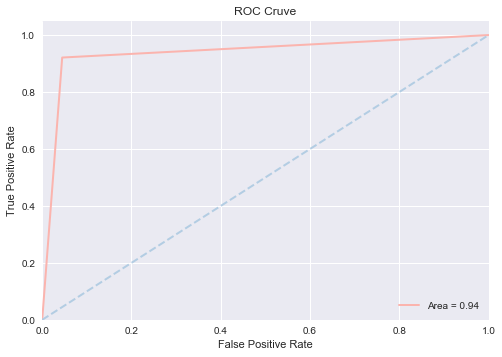

In [32]:
'''
ROC Curve
'''
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(np.argmax(labels_test,1), test_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, 
         lw=lw, label='Area = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Cruve')
plt.legend(loc="lower right")
plt.show()

# Decision Support System

In [33]:
from ipywidgets import *
from IPython.display import display

y_val = 0
age = widgets.IntSlider(
    value=20,
    min=1,
    max=99,
    step=1,
    description='Age:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white'
)

sex = widgets.Dropdown(
    options={'Male': 1, 'Female': 0,},
    value=1,
    description='Sex:',
)

restbp = widgets.IntSlider(
    value=20,
    min=1,
    max=250,
    step=1,
    description='Resting BP:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white'
)


cholestrol = widgets.IntSlider(
    value=100,
    min=1,
    max=650,
    step=1,
    description='Cholestrol:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white'
)


fbs = widgets.Dropdown(
    options={'0': 0, '1': 1},
    value=1,
    description='Fasting Blood Sugar:',
)

thalach = widgets.IntSlider(
    value=80,
    min=30,
    max=250,
    step=1,
    description='Max. heart rate:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white'
)


exang = widgets.Dropdown(
    options={'0': 0, '1': 1},
    value=1,
    description='Exang:',
)


oldpeak = widgets.BoundedFloatText(
    value=5.0,
    min=0,
    max=10.0,
    step=0.1,
    description='Old Peak:',
    disabled=False,
    color='black'
)


ca = widgets.Dropdown(
    options={'0': 0, '1': 1, '2': 2, '3': 3},
    value=1,
    description='CA:',
)


chest_pain = widgets.Dropdown(
    options={'Typical angina': 0, 'Atypical angina': 1, 'Non-Anginal': 2, 'Asumptomatic': 3},
    value=1,
    description='Pain Type:',
)



recg = widgets.Dropdown(
    options={'Normal': 0, 'S-T wave abnormal': 1, 'LV hypertrophy': 2},
    value=1,
    description='Rest ECG:',
)


slope = widgets.Dropdown(
    options={'Upsloping': 0, 'Flat': 1, 'Downsloping': 2},
    value=1,
    description='Slope:',
)


thal = widgets.Dropdown(
    options={'Normal': 0, 'Fixed Defect': 1, 'Reversable Defect': 2},
    value=1,
    description='Thal:',
)

submit = Button(description="submit")

items = [age, sex, restbp, cholestrol, fbs, thalach, exang, oldpeak, ca, chest_pain, recg, slope, thal, submit]

form = VBox(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='40%'
))
display(form)

y_val = []
def on_button_clicked(b):
    cp  = [0,0,0,0]
    rec = [0,0,0]
    slope = [0,0,0]
    thal = [0,0,0]
    
    for i in items[:-1]:
        #print(i.description)
        if i.description == "Pain Type:":
            cp[i.value] = 1
            y_val.extend(cp)
            continue
            
        if i.description == 'Rest ECG:':
            rec[i.value] = 1
            y_val.extend(rec)
            continue
            
        if i.description == "Slope:":
            slope[i.value] = 1
            y_val.extend(slope)
            continue
        
        if i.description == 'Thal:':
            thal[i.value] =1
            y_val.extend(thal)
            continue
        
        y_val.append(i.value)

submit.on_click(on_button_clicked)

In [34]:
#print(y_val)
#insert the prediction code here.

std_cols = [0,2,3,5,7]

print(y_val)

j = 0
for i in std_cols:
    y_val[i] = (y_val[i] - std_cols[j])/ std_stdcols[j]
    j+=1
    
y_val[8] = (y_val[8] - mean_ca) / (max_ca - min_ca)

#print(y_val)

val = np.array(y_val)
#print(np.shape(val))
val = val.reshape(1,22)

with tf.Session() as sess:
    saver.restore(sess, 'model/heart_disease')
    new_p = tf.argmax(logits, 1)

    # New Prediction
    classification = new_p.eval(feed_dict={ x: val})

[]


IndexError: list index out of range

In [ ]:
# Predicted value: absence (0) or presence (1)
if classification == 0:
    print('Absence')
else:
    print('Presence')

# THANKS